In [ ]:
# C3 Planetenbahnen

Jupyter-Notebook Abgabe von Rene-David Brueggemann 10040204 und Batuhan Muslu 10040344.
Hier wird Python 3.8.6 64-bit genutzt

Die Loesung ist stark inspiriert nach der Aufloesung laut Natt, Oliver,*Physik mit Python*

Wir wollen uns davon überzeugen, dass das Kepler-Problem tatsächlich die in der Vorlesung diskutierten Bahnen besitzt. Dafür simulieren wir die Bewegung eines kleineren Planeten im Gravitationsfeld der Sonne. Wir machen die Vereinfachung, dass wir μ ≈ m Planet setzen, und die (sehr viel schwerere) Sonne als fest im Ursprung sitzend annehmen.

In [1]:
#Importierung aller notwendigen Bibliotheken
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

### Teilaufgabe a)
Simulieren Sie die Bahn der Erde. Als Anfangsbedingung wählen wir Position und Geschwindigkeit der Erde in ihrem Aphel. Sie hat dort einen Abstand von 152.10 · 10^9 m von der Sonne
und eine Momentangeschwindigkeit von 29.29 km/s, die im Aphel senkrecht auf dem Ortsvektor steht. Es ist sinnvoll, die Simulation in Astronomischen Einheiten durchzuführen, definiert als
1 AE = 1.495 979 707*10^11 m. Eine Astronomische Einheit ist die mittlere Entfernung der Erde
von der Sonne. Da wir wissen, dass die Bewegung in einer Ebene stattfindet, können wir die Bewegungsgleichung als zweidimensionales Problem formulieren. Lösen Sie dieses mit Hilfe von scipy.integrate.solve_ivp aus dem SciPy Module. Führen Sie die Simulation für 5 Jahre durch,
wählen Sie eine Schrittweite von 1 Tag. Damit die Lösung ausreichend genau wird, übergeben Sie
der Funktion solve_ivp die Option rtol=1e-9 , die die Fehlerschranke sehr klein wählt.

<function matplotlib.pyplot.show(close=None, block=None)>

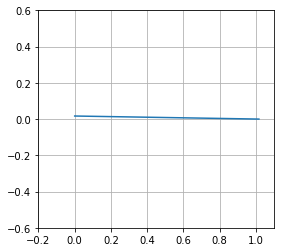

In [4]:
#Variablen deklarieren und initialisieren

j = 365 #1 Jahr [d]
AE = 1.495979707e11 #Astronomische Einheit [m]

#Simulationsdauer T und Schrittweite dt
dt = 1 #Schrittweite [d]
T = 5*j #Periode [j]
M =  1.9885e30 #Masse der Sonne M [kg]
G = 6.6743015e-11 * (60*60*24)**2/ AE**3 #Gravitationskonstante 

#Gegebene Anfangsvariablen definieren
r0 =  np.array([152.10e9 / AE, 0.0]) #Entfernung der Erde von der Sonne im Aphel [AE]

v0 = np.array([0.0, 29.29 * 60*60*24*1000/AE]) #Momentangeschwindigkeit der Erde im Aphel in [AE/d]

def f(t, u):
    r, v = np.split(u, 2)
    a = - G * M * r / np.linalg.norm(r)**3
    return np.concatenate([v, a])

#Zustandsvektor zum Zeitpunkt t=0 festlegen
u0 = np.concatenate([r0, v0])

#Loesung der Differentialgleichung mit scipy ausrechnen mit der option rtol=1e-9
sol = integrate.solve_ivp(f, [0, T], u0, t_eval=np.linspace(0, int(T), dt), rtol=1e-9)

t_s = sol.t
r_s, v_s = np.split(sol.y, 2)

#Erzeugen einer Figur und einer Axis 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel=('x [AE]')
ax.set_ylabel=('y [AE]')
ax.set_xlim(-0.2, 1.1)
ax.set_ylim(-0.6, 0.6)
ax.set_aspect('equal')
ax.grid()

#Plotten der Bahnkurve der Erde
plt.plot(r_s, v_s)
plt.show

### Teilaufgabe b)
Wiederholen Sie die Simulation für Merkur. Die Dauer sollte jetzt ein Erdjahr betragen, die Schrittweite wieder ein Erdtag. Sein Abstand zur Sonne im Aphel beträgt 0.466 697 AE. Der Merkur hat dort eine Geschwindigkeit von 38.8586 km/s. Sie sollten herausfinden, dass die Bahn des Merkur deutlich stärker elliptisch ist, als die der Erde. Gegebenenfalls müssen Sie durch Optionen für solve_ivp die Genauigkeit weiter steigern.

### Teilaufgabe c)
Fügen Sie dem Zentralpotential einen Term −γ/r 3 ähnlich wie in [P18] hinzu. Dies führt zu einer
zusätzlichen Kraft F ~ ART = −γ ~r/r 5 . Simulieren Sie die Bewegung des Merkurs für ein Erdjahr,
wählen Sie als Schrittweite wieder einen Tag. Probieren Sie verschiedene Werte für γ. Mit etwas
Glück ergeben sich statt einer Ellipse Rosetten.
Bemerkung: In der Tat dreht sich das Perihel des Merkurs im Laufe der Zeit langsam. Der größte
Anteil dieser Periheldrehung geht allerdings auf den Einfluss der anderen Planeten als Störung zum
Zweikörper-Problem zurück. Jedoch ergab sich im Laufe der Zeit eine signifikante Abweichung
der Beobachtung vom theoretisch vorhergesagten Wert, der durch Einsteins allgemeine Relativi-
tätstheorie letztendlich im Rahmen der Messgenauigkeit exakt erklärt wird.